# Visualization of COVID Cases of states in India (REAL TIME)

## Data Scraping

This can scrape data for all states of india.

In [1004]:
#essential libraries
import pandas as pd
from datetime import date
import numpy as np

#libraries to scrape data
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

#libraries for plotting
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#import libraries for plotting maps
import geopandas as gpd
import descartes as dc

In [862]:
#ignore certification errors

ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode=ssl.CERT_NONE



In [863]:
#state to view
a=input("Enter the state: ")


Enter the state: maharashtra


In [864]:
#data scraping of the state
url='https://covidindia.org/'+a+'/'
html=urllib.request.urlopen(url).read()
soup=BeautifulSoup(html,'html.parser')

data=[]  
table = soup.find('table')
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols[:-1] if ele]) # Get rid of empty values and not scrape active cases value

In [878]:
#make a dataframe 

# colo=['District','Total Cases','Recoveries','Death','Active']
colo=['District','Total Cases','Recoveries','Death']
df = pd.DataFrame(data,columns=colo)
print(df)

           District Total Cases Recoveries Death
0        Ahmednagar         848        524    20
1             Akola        1875       1468    92
2          Amravati         823        613    36
3        Aurangabad        8217       4042   338
4              Beed         220        105     5
5          Bhandara         162         89     0
6          Buldhana         399        206    16
7        Chandrapur         164         96     0
8             Dhule        1517        835    76
9        Gadchiroli         115         66     1
10           Gondia         210        156     3
11          Hingoli         341        276     2
12          Jalgaon        5810       3336   345
13            Jalna         983        506    47
14         Kolhapur        1123        807    20
15            Latur         664        325    33
16      Mumbai City       92988      64872  5288
17  Mumbai suburban           0          0     0
18           Nagpur         279        149    11
19           Nanded 

In [879]:
#Convert string into int

# df[['Total Cases','Recoveries', 'Death', 'Active']] = df[['Total Cases','Recoveries', 'Death', 'Active']].astype('int')

df[['Total Cases','Recoveries', 'Death']] = df[['Total Cases','Recoveries', 'Death', ]].astype('int')
df

,District,Total Cases,Recoveries,Death
0,Ahmednagar,848,524,20
1,Akola,1875,1468,92
2,Amravati,823,613,36
3,Aurangabad,8217,4042,338
4,Beed,220,105,5
5,Bhandara,162,89,0
6,Buldhana,399,206,16
7,Chandrapur,164,96,0
8,Dhule,1517,835,76
9,Gadchiroli,115,66,1


We notice in case of maharashtra state, the site has some discrepancies. The site by default shows the total number of cases in mumbai(city+suburban) in mumbai city and shows 0 in suburban. 
So we add the numbers and store it collectively as mumbai.

#### this is to be done only in the case of maharashtra

In [880]:
## this is to be done only in the case of maharashtra
# add the numbers from mumbai suburban and mumbai city and display as mumbai since official data has data about  mumbai and not suburban and city individually
if(a=='maharshtra'):
    tc=((df.loc[df.District=='Mumbai City']['Total Cases']).values[0]+(df.loc[df.District=='Mumbai suburban']['Total Cases']).values[0])
    r=((df.loc[df.District=='Mumbai City']['Recoveries']).values[0]+(df.loc[df.District=='Mumbai suburban']['Recoveries']).values[0])
    d=((df.loc[df.District=='Mumbai City']['Death']).values[0]+(df.loc[df.District=='Mumbai suburban']['Death']).values[0])


    df=df.append({'District':'Mumbai', 'Total Cases':tc,'Recoveries':r,'Death':d}, ignore_index=True)

    #drop the other two columns
    df=df[df.District!='Mumbai suburban']
    df=df[df.District!='Mumbai City']

    df

,District,Total Cases,Recoveries,Death
0,Ahmednagar,848,524,20
1,Akola,1875,1468,92
2,Amravati,823,613,36
3,Aurangabad,8217,4042,338
4,Beed,220,105,5
5,Bhandara,162,89,0
6,Buldhana,399,206,16
7,Chandrapur,164,96,0
8,Dhule,1517,835,76
9,Gadchiroli,115,66,1


The issue that we face here is that the website erratically removes the data from the active cases column. 
For this reason, I calculate active column cases 
active cases=total cases- recoveries-death

In [882]:
#Calculate active cases
df['Active']=df.apply(lambda x: (x['Total Cases']-x['Recoveries']-x['Death']), axis=1)
df


,District,Total Cases,Recoveries,Death,Active
0,Ahmednagar,848,524,20,304
1,Akola,1875,1468,92,315
2,Amravati,823,613,36,174
3,Aurangabad,8217,4042,338,3837
4,Beed,220,105,5,110
5,Bhandara,162,89,0,73
6,Buldhana,399,206,16,177
7,Chandrapur,164,96,0,68
8,Dhule,1517,835,76,606
9,Gadchiroli,115,66,1,48


In [884]:
# # save csv as a dataset

# name='data_'+a+'.csv'
# df.to_csv(name,index=False) 

In [885]:
#total counts of every group

Total = pd.Series([df['Total Cases'].sum(),df['Recoveries'].sum(),df['Death'].sum(),df['Active'].sum()] , index =['Total Cases','Recoveries','Death','Active']) 
# Total.loc['Recoveries']
Total

Total Cases    254427
Recoveries     140325
Death           10289
Active         103813
dtype: int64

# Data Visualization

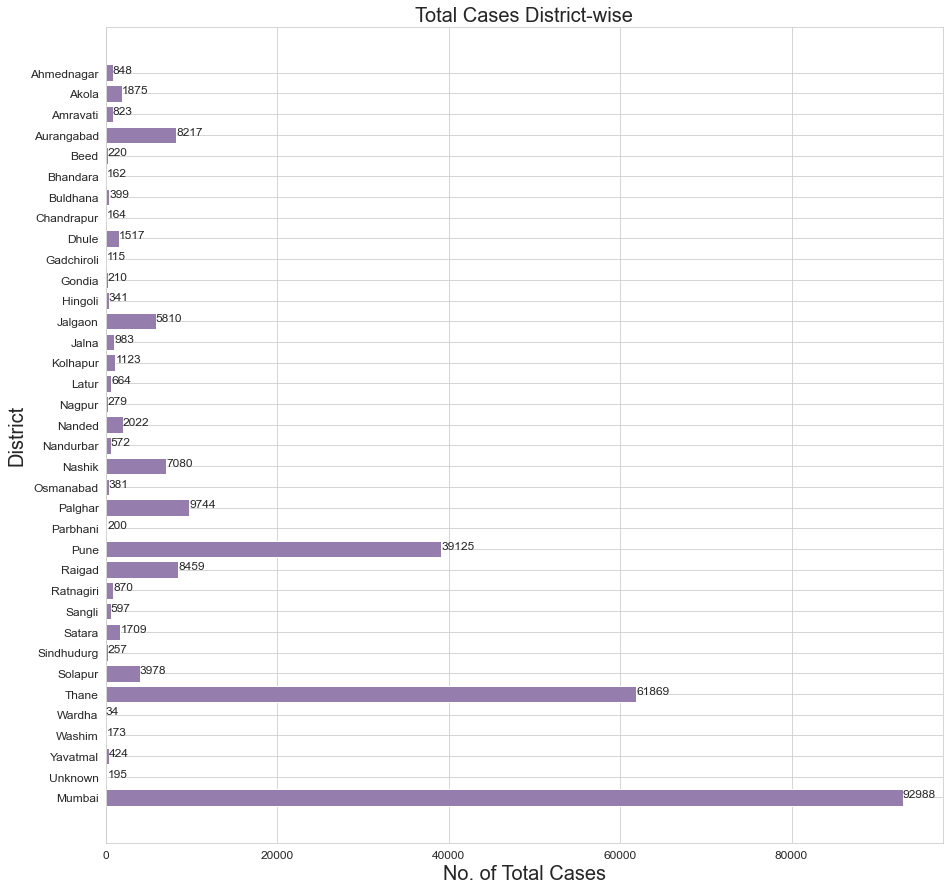

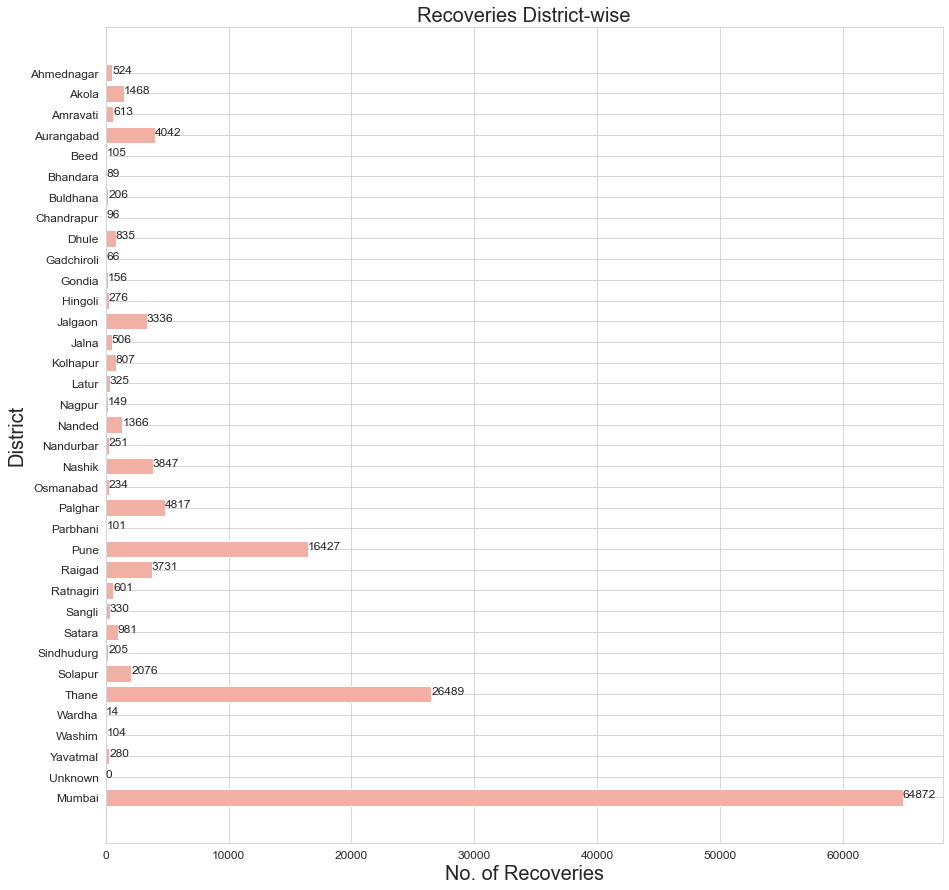

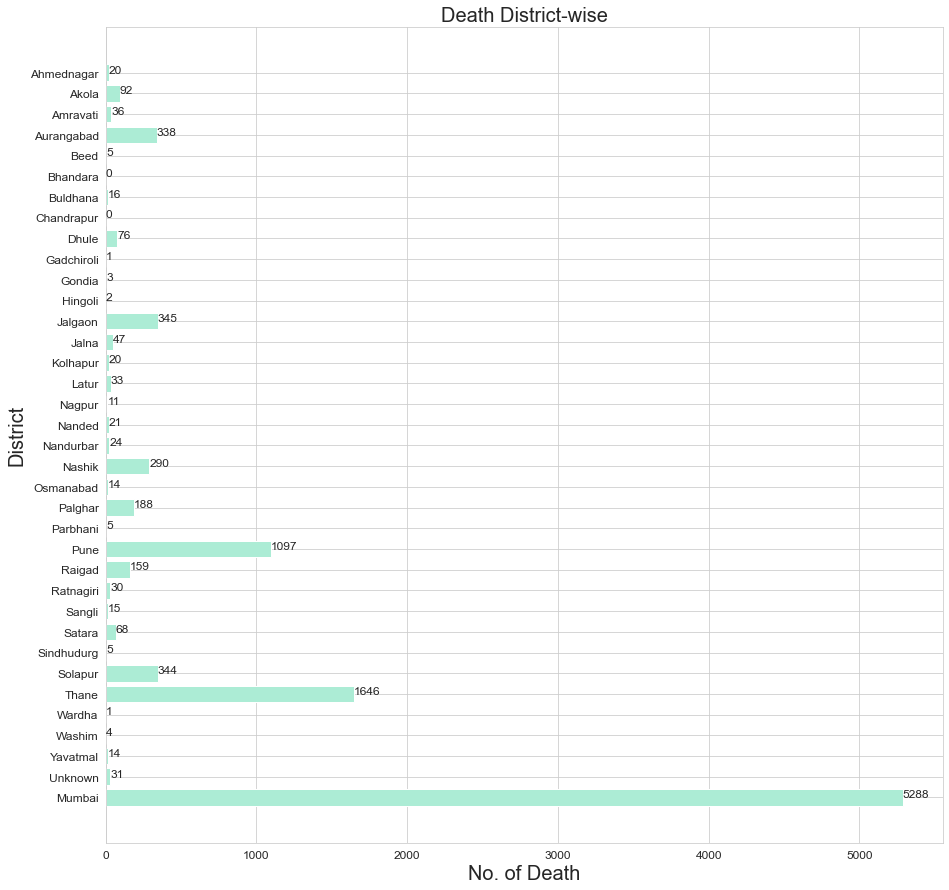

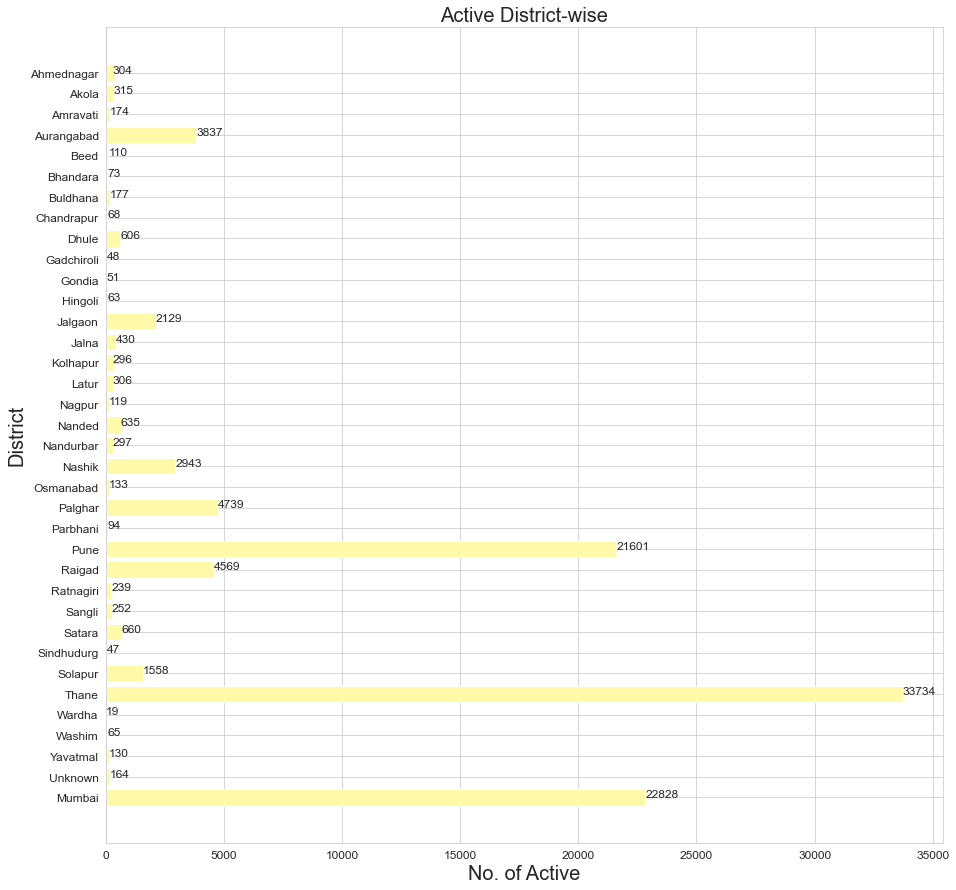

In [886]:
#bar chart
sns.set_style("whitegrid")
for i,j in zip(['Total Cases','Recoveries','Death','Active'],['#957DAD','#F2AFA3','#ACECD5','#FFF9AA']):
    plt.figure(figsize = (15,15))
    plt.barh(df['District'],    df[i],align = 'center', color = j)
    plt.xlabel(('No. of '+i), fontsize = 20)
    plt.ylabel('District', fontsize = 20)
    plt.gca().invert_yaxis()
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title((i+' District-wise'), fontsize = 20 )
    for index, value in enumerate(df[i]):
        plt.text(value, index, str(value), fontsize = 12)
    plt.show()

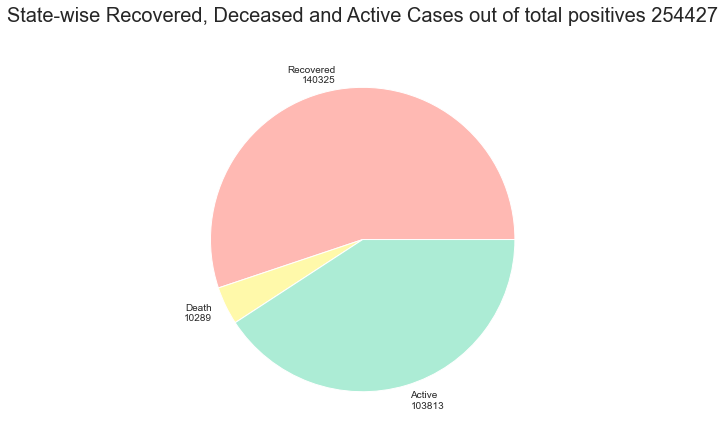

In [887]:
# Pie Chart — Statewise total Confirmed, Recovered and Deceased cases


class_sum =[df['Recoveries'].sum(),df['Death'].sum(),df['Active'].sum()]
class_labels = ['Recovered\n' + str(df['Recoveries'].sum()),
                'Death\n' + str(df['Death'].sum()), 'Active\n' + str(df['Active'].sum())]
custom_colors = ['#FFB9B3','#FFF9AA','#ACECD5']
plt.figure(figsize = (7,7))
plt.pie(class_sum, labels = class_labels,colors = custom_colors)
plt.rc('font',size=16)
plt.title(('State-wise Recovered, Deceased and Active Cases out of total positives '+ str(df['Total Cases'].sum())+'\n'), fontsize = 20)
plt.show()

## Plotting on map

In [888]:
# data cleaning before using state name to make compatible with map

print(a)

#replacing hiphen in user entered state name by space
if('-' in a):
    a=a.replace('-',' ')
    
print(a)

maharashtra
maharashtra


In [959]:
# reading the shape file of map of India in GeoDataFrame
map_data = gpd.read_file('shapefile/gadm36_IND_2.shp')

map_data.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


In [960]:
#change column names for required columns and exgtact information for required state 
map_data.rename(columns = {'NAME_2':'District'}, inplace = True)
map_data.rename(columns = {'NAME_1':'st_name'}, inplace = True)
map_data['st_name']=map_data1['st_name'].str.lower()
map_data=map_data1[map_data1.loc[:,'st_name'] == a]

map_data.head()

,GID_0,NAME_0,GID_1,st_name,NL_NAME_1,GID_2,District,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
340,IND,India,IND.20_1,maharashtra,None,IND.20.1_1,Ahmadnagar,Ahmadnagar,None,District,District,None,IN.MH.AH,"POLYGON ((74.83829 18.33893, 74.83713 18.34180..."
341,IND,India,IND.20_1,maharashtra,None,IND.20.2_1,Akola,None,None,District,District,None,IN.MH.AK,"POLYGON ((76.82024 20.28149, 76.81767 20.28176..."
342,IND,India,IND.20_1,maharashtra,None,IND.20.3_1,Amravati,"Amaravati, Amraoti, Amaraoti",None,District,District,None,IN.MH.AM,"POLYGON ((78.08906 21.18236, 78.09028 21.17835..."
343,IND,India,IND.20_1,maharashtra,None,IND.20.4_1,Aurangabad,None,None,District,District,None,IN.MH.AU,"POLYGON ((75.21554 19.55770, 75.20956 19.56258..."
344,IND,India,IND.20_1,maharashtra,None,IND.20.5_1,Bhandara,None,None,District,District,None,IN.MH.BH,"MULTIPOLYGON (((80.43332 21.09715, 80.42831 21..."


In [961]:
#check type of map_data
type(map_data)


geopandas.geodataframe.GeoDataFrame

In [962]:
# separate only the needed columns - district and geometry 
map_data=map_data[['District','geometry']]

#reseting index
map_data=map_data.reset_index(drop=True)


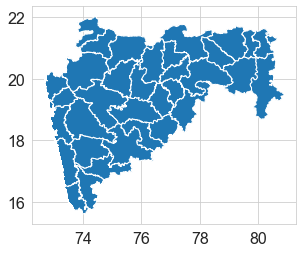

In [963]:
# check the map
map_data.plot()


In [964]:
# # # data cleaning before merging

#creating a copy of scraped dataframe
dt=df

#renaming cities like Mumbai (City) as Mumbai city
dt['District']=dt['District'].str.replace('(','')
dt['District']=dt['District'].str.replace(')','')
dt['District']=dt['District'].str.capitalize()
dt=dt[dt.District != 'Unknown']
dt=dt.sort_values('District')
dt=dt.reset_index(drop=True)
print(dt)

# capitalize district to match the scraped data-set

map_data['District']=map_data['District'].str.capitalize() 
map_data['District']=map_data['District'].str.replace('*','')
map_data['District']=map_data['District'].str.replace('(','')
map_data['District']=map_data['District'].str.replace(')','')
print(map_data)



      District  Total Cases  Recoveries  Death  Active
0   Ahmednagar          848         524     20     304
1        Akola         1875        1468     92     315
2     Amravati          823         613     36     174
3   Aurangabad         8217        4042    338    3837
4         Beed          220         105      5     110
5     Bhandara          162          89      0      73
6     Buldhana          399         206     16     177
7   Chandrapur          164          96      0      68
8        Dhule         1517         835     76     606
9   Gadchiroli          115          66      1      48
10      Gondia          210         156      3      51
11     Hingoli          341         276      2      63
12     Jalgaon         5810        3336    345    2129
13       Jalna          983         506     47     430
14    Kolhapur         1123         807     20     296
15       Latur          664         325     33     306
16      Mumbai        92988       64872   5288   22828
17      Na

In [966]:

#dissolve mumbai suburban and mumbai city as one geometry --> Mumbai

#add an additional row to dissolve by labeling mumbai suburban and mumbai city as mumbai
map_data['dis']=map_data.apply(lambda x : 'Mumbai' if (x.District == 'Mumbai suburban' or x.District == 'Mumbai city')  else x.District, axis=1 )
# dissolve 
map_data=map_data.dissolve(by='dis')

# reset index
map_data.index.name = None
map_data=map_data.reset_index()

map_data
 

,level_0,geometry,index,District
0,Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",Ahmadnagar,Ahmadnagar
1,Akola,"POLYGON ((76.82024 20.28149, 76.81767 20.28176...",Akola,Akola
2,Amravati,"POLYGON ((78.08906 21.18236, 78.09028 21.17835...",Amravati,Amravati
3,Aurangabad,"POLYGON ((75.21554 19.55770, 75.20956 19.56258...",Aurangabad,Aurangabad
4,Bhandara,"MULTIPOLYGON (((79.79656 20.68351, 79.79427 20...",Bhandara,Bhandara
5,Bid,"POLYGON ((75.58914 18.69700, 75.59061 18.68763...",Bid,Bid
6,Buldana,"POLYGON ((76.53200 19.85120, 76.53134 19.85667...",Buldana,Buldana
7,Chandrapur,"POLYGON ((79.51482 19.54076, 79.51595 19.53681...",Chandrapur,Chandrapur
8,Dhule,"POLYGON ((74.93796 20.92760, 74.93751 20.91903...",Dhule,Dhule
9,Garhchiroli,"POLYGON ((80.26754 18.71797, 80.26037 18.71410...",Garhchiroli,Garhchiroli


In [967]:
#rename drop District and index as District 

map_data=map_data.loc[:,['index','geometry']]
map_data.rename(columns = {'index':'District'}, inplace = True)
map_data

,District,geometry
0,Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180..."
1,Akola,"POLYGON ((76.82024 20.28149, 76.81767 20.28176..."
2,Amravati,"POLYGON ((78.08906 21.18236, 78.09028 21.17835..."
3,Aurangabad,"POLYGON ((75.21554 19.55770, 75.20956 19.56258..."
4,Bhandara,"MULTIPOLYGON (((79.79656 20.68351, 79.79427 20..."
5,Bid,"POLYGON ((75.58914 18.69700, 75.59061 18.68763..."
6,Buldana,"POLYGON ((76.53200 19.85120, 76.53134 19.85667..."
7,Chandrapur,"POLYGON ((79.51482 19.54076, 79.51595 19.53681..."
8,Dhule,"POLYGON ((74.93796 20.92760, 74.93751 20.91903..."
9,Garhchiroli,"POLYGON ((80.26754 18.71797, 80.26037 18.71410..."


In [968]:
# changes to be done in

d=pd.concat([map_data['District'],dt['District']], axis= 1,keys=['mp_d','dt_d'])
d['change'] = d.apply(lambda x : ('change') if x['dt_d'] != x['mp_d'] else "", axis=1 )
d[d['change']=='change']

,mp_d,dt_d,change
0,Ahmadnagar,Ahmednagar,change
4,Bhandara,Beed,change
5,Bid,Bhandara,change
6,Buldana,Buldhana,change
9,Garhchiroli,Gadchiroli,change
10,Gondiya,Gondia,change
25,Raigarh,Raigad,change


In [969]:
#change district names in map_data according to scraped data

map_data.replace("Ahmadnagar","Ahmednagar", inplace=True)
map_data.replace("Bid","Beed", inplace=True)
map_data.replace("Buldana","Buldhana", inplace=True)
map_data.replace("Garhchiroli","Gadchiroli", inplace=True)
map_data.replace("Gondiya","Gondia", inplace=True)
map_data.replace("Raigarh","Raigad", inplace=True)

map_data=map_data.sort_values('District')
#reseting index
map_data=map_data.reset_index(drop=True)
map_data

,District,geometry
0,Ahmednagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180..."
1,Akola,"POLYGON ((76.82024 20.28149, 76.81767 20.28176..."
2,Amravati,"POLYGON ((78.08906 21.18236, 78.09028 21.17835..."
3,Aurangabad,"POLYGON ((75.21554 19.55770, 75.20956 19.56258..."
4,Beed,"POLYGON ((75.58914 18.69700, 75.59061 18.68763..."
5,Bhandara,"MULTIPOLYGON (((79.79656 20.68351, 79.79427 20..."
6,Buldhana,"POLYGON ((76.53200 19.85120, 76.53134 19.85667..."
7,Chandrapur,"POLYGON ((79.51482 19.54076, 79.51595 19.53681..."
8,Dhule,"POLYGON ((74.93796 20.92760, 74.93751 20.91903..."
9,Gadchiroli,"POLYGON ((80.26754 18.71797, 80.26037 18.71410..."


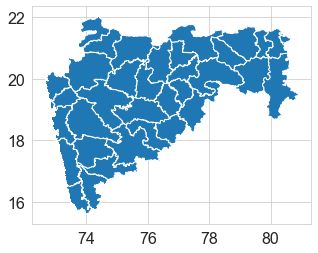

In [970]:
map_data.plot()

In [971]:
#Merge the two dataframes dt and map_data on District names —

merged_data = pd.merge(map_data, dt, 
                       how = 'left', on = 'District')
merged_data.fillna(0, inplace = True)

merged_data

,District,geometry,Total Cases,Recoveries,Death,Active
0,Ahmednagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",848,524,20,304
1,Akola,"POLYGON ((76.82024 20.28149, 76.81767 20.28176...",1875,1468,92,315
2,Amravati,"POLYGON ((78.08906 21.18236, 78.09028 21.17835...",823,613,36,174
3,Aurangabad,"POLYGON ((75.21554 19.55770, 75.20956 19.56258...",8217,4042,338,3837
4,Beed,"POLYGON ((75.58914 18.69700, 75.59061 18.68763...",220,105,5,110
5,Bhandara,"MULTIPOLYGON (((79.79656 20.68351, 79.79427 20...",162,89,0,73
6,Buldhana,"POLYGON ((76.53200 19.85120, 76.53134 19.85667...",399,206,16,177
7,Chandrapur,"POLYGON ((79.51482 19.54076, 79.51595 19.53681...",164,96,0,68
8,Dhule,"POLYGON ((74.93796 20.92760, 74.93751 20.91903...",1517,835,76,606
9,Gadchiroli,"POLYGON ((80.26754 18.71797, 80.26037 18.71410...",115,66,1,48


In [974]:
# To plot Name of district on the map, we need the points. We only have polygons, which makes it impossible to put names.
# Solution is to find a centroid of the polygon. By centroid function given by the GeoPandas library, we can find the points needed to plot district names

# set centroid

merged_data["center"] = merged_data["geometry"].centroid

# Making a copy since we need to set column center as geometry 
t_points = merged_data.copy()
t_points.set_geometry("center", inplace = True)
print(merged_data.head())
print(t_points.head())

# We can also get points by representative point function which gives a point inside the boundary of the polygon
# For Representative points  merged_data["rep"] = merged_data["geometry"].representative_point()




     District                                           geometry  Total Cases  \
0  Ahmednagar  POLYGON ((74.83829 18.33893, 74.83713 18.34180...          848   
1       Akola  POLYGON ((76.82024 20.28149, 76.81767 20.28176...         1875   
2    Amravati  POLYGON ((78.08906 21.18236, 78.09028 21.17835...          823   
3  Aurangabad  POLYGON ((75.21554 19.55770, 75.20956 19.56258...         8217   
4        Beed  POLYGON ((75.58914 18.69700, 75.59061 18.68763...          220   

   Recoveries  Death  Active                     center  
0         524     20     304  POINT (74.64550 19.23322)  
1        1468     92     315  POINT (77.04457 20.75029)  
2         613     36     174  POINT (77.56873 21.18930)  
3        4042    338    3837  POINT (75.27591 20.02267)  
4         105      5     110  POINT (75.80200 18.92511)  
     District                                           geometry  Total Cases  \
0  Ahmednagar  POLYGON ((74.83829 18.33893, 74.83713 18.34180...          848   
1  

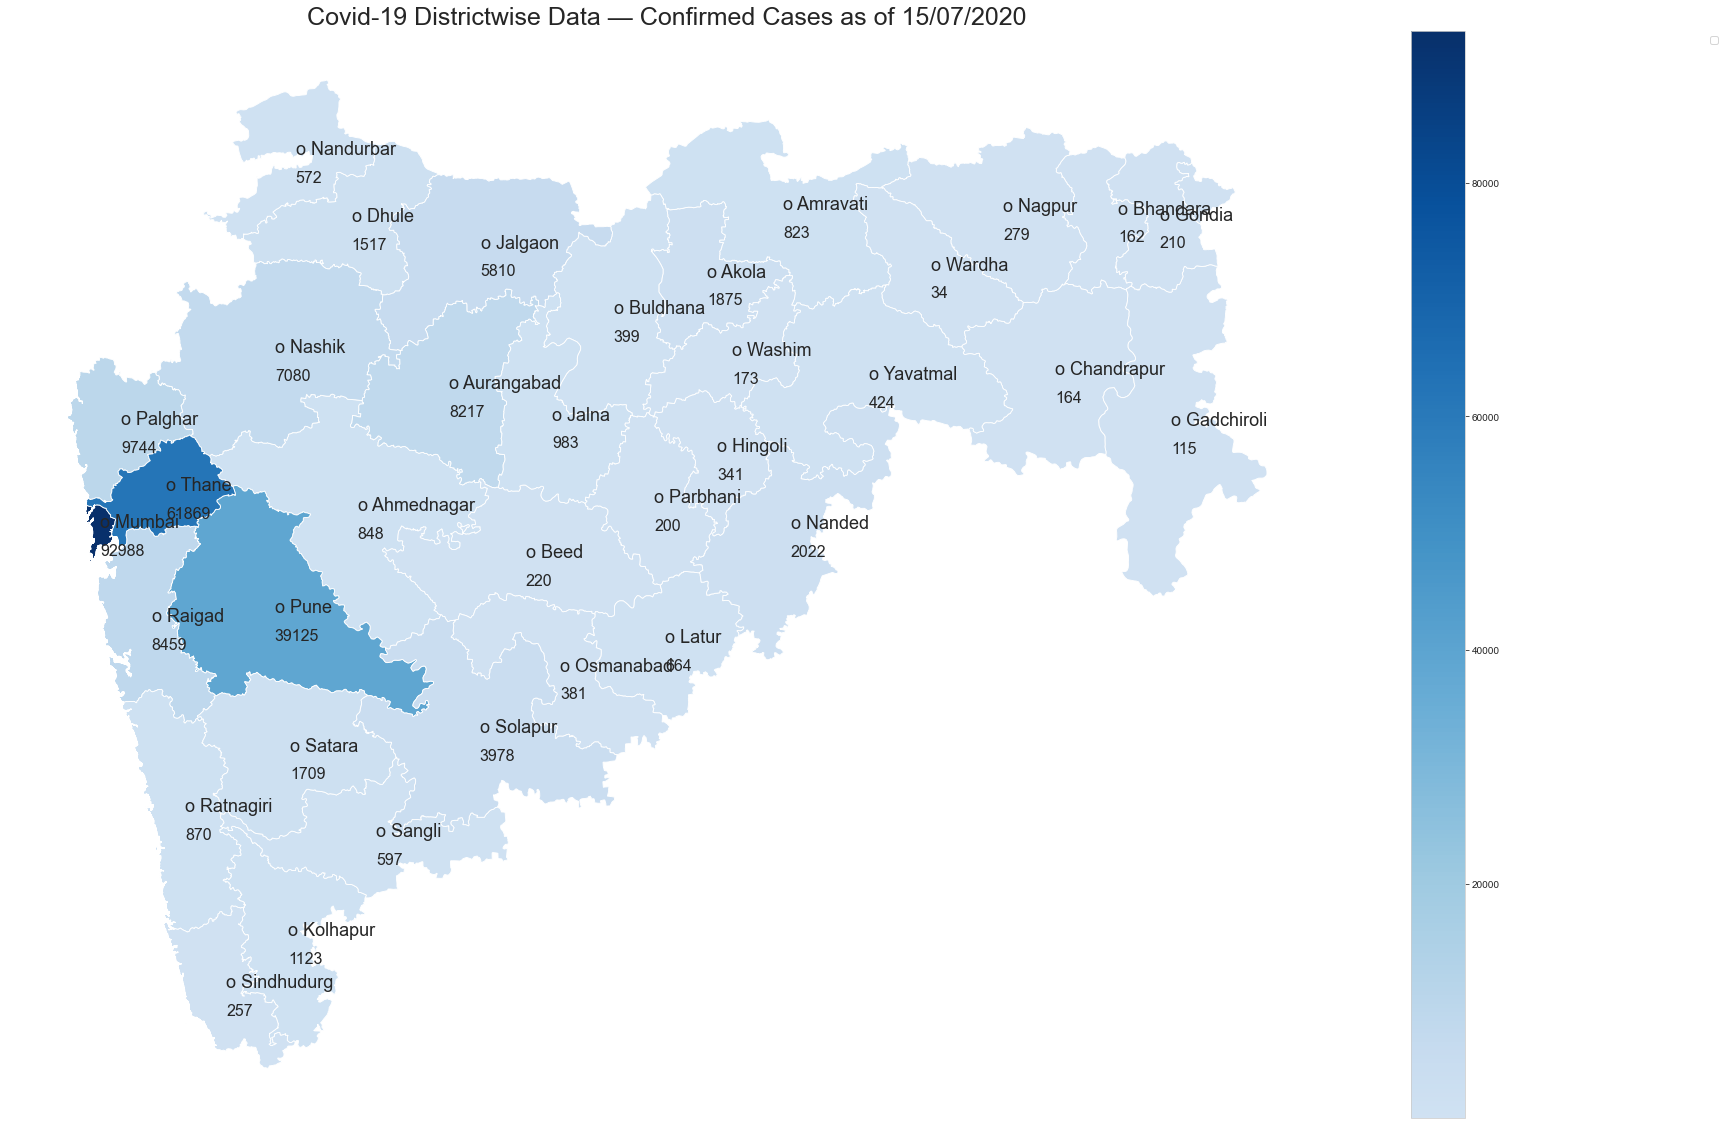

In [1026]:
fig, ax = plt.subplots(1, figsize=(30, 20))
ax.axis('off')
cmap1=plt.cm.get_cmap('Blues',516)
cmap2=ListedColormap(cmap1(np.linspace(0.2,1,256)))

t='Covid-19 Districtwise Data — Confirmed Cases as of '+ str(date.today().strftime("%d/%m/%Y"))

ax.set_title(t, 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Total Cases', cmap=cmap2, 
                 linewidth=0.9, ax=ax, edgecolor='1', 
                 legend = True)
plt.legend(merged_data['Total Cases'])
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))

for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["District"]):
    texts.append(plt.text(x, y, 'o '+label, fontsize = 18))
for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["Total Cases"]):
    plt.text(x, (y-0.18), label, fontsize = 16)    
      
plt.show()

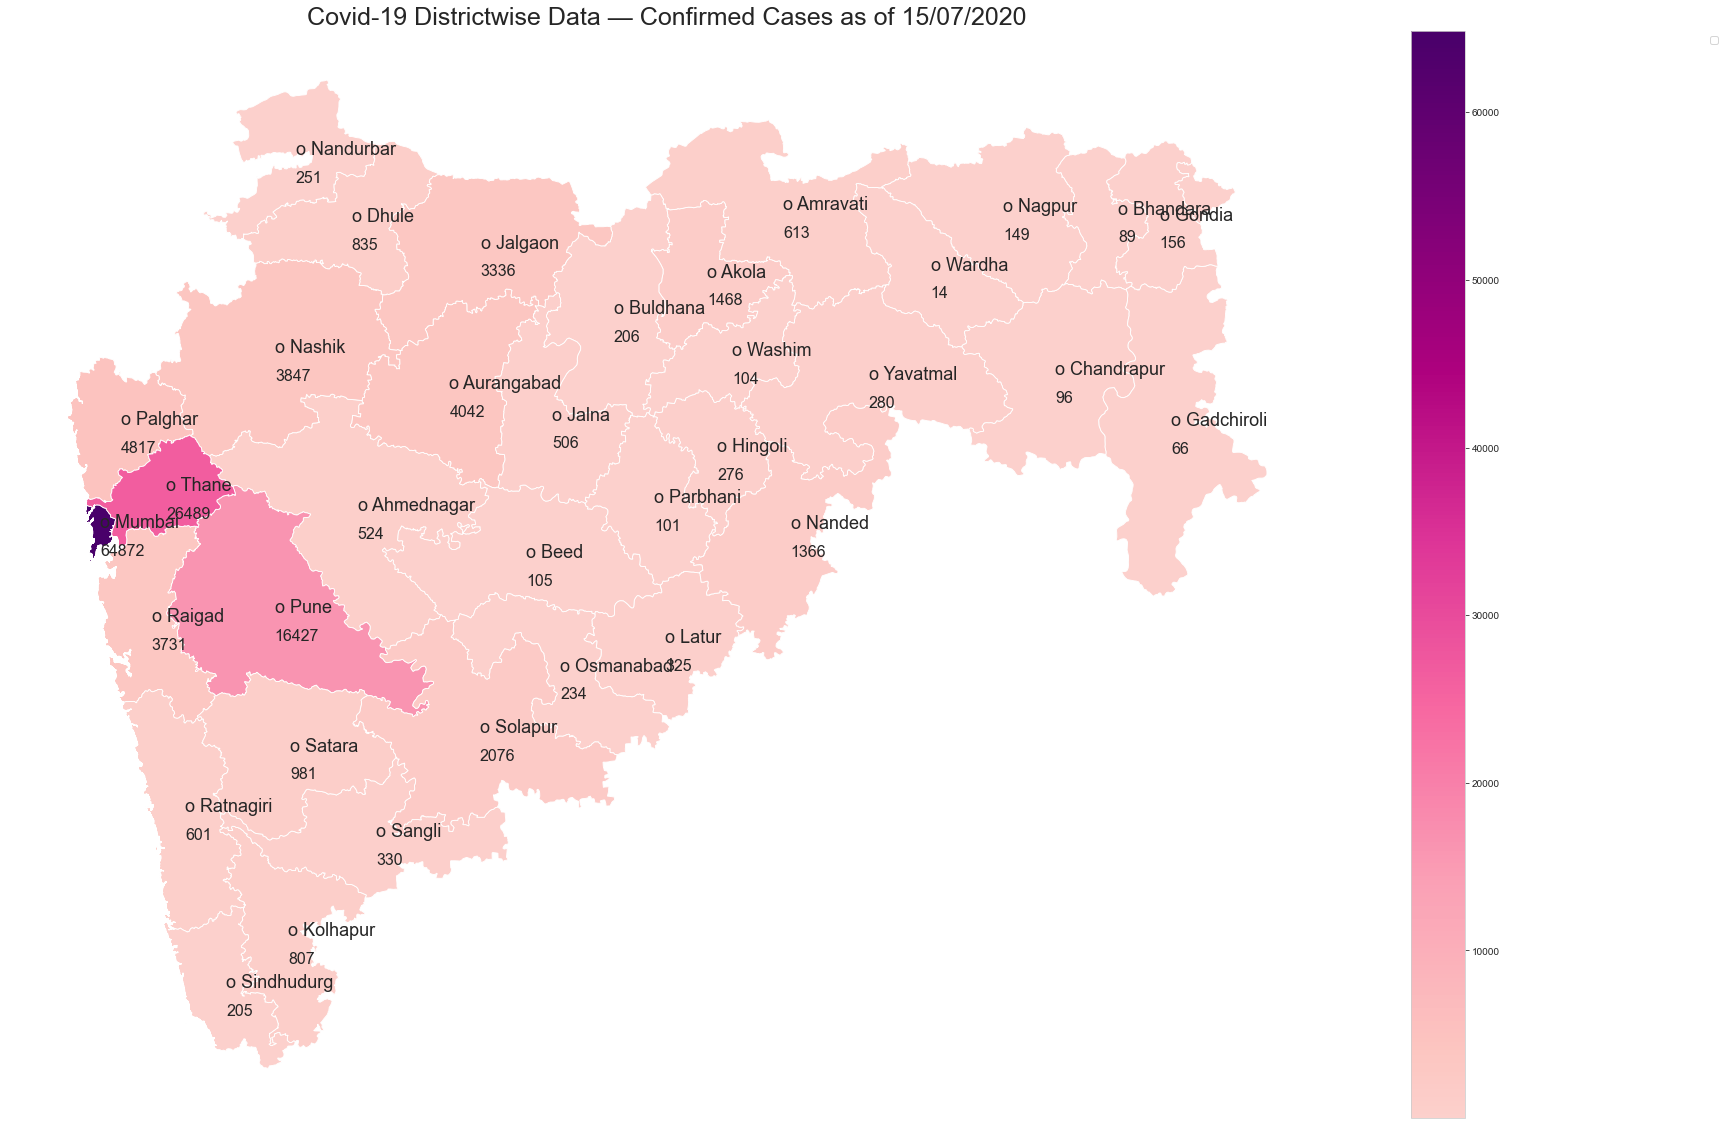

In [1017]:
fig, ax = plt.subplots(1, figsize=(30, 20))
ax.axis('off')
cmap1=plt.cm.get_cmap('RdPu',516)
cmap2=ListedColormap(cmap1(np.linspace(0.2,1,256)))

t='Covid-19 Districtwise Data — Recovered Cases as of '+ str(date.today().strftime("%d/%m/%Y"))

ax.set_title(t, 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Recoveries', cmap=cmap2, 
                 linewidth=0.9, ax=ax, edgecolor='1', 
                 legend = True)
plt.legend(merged_data['Recoveries'])
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))

for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["District"]):
    texts.append(plt.text(x, y, 'o '+label, fontsize = 18))
for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["Recoveries"]):
    plt.text(x, (y-0.18), label, fontsize = 16)    
      
plt.show()

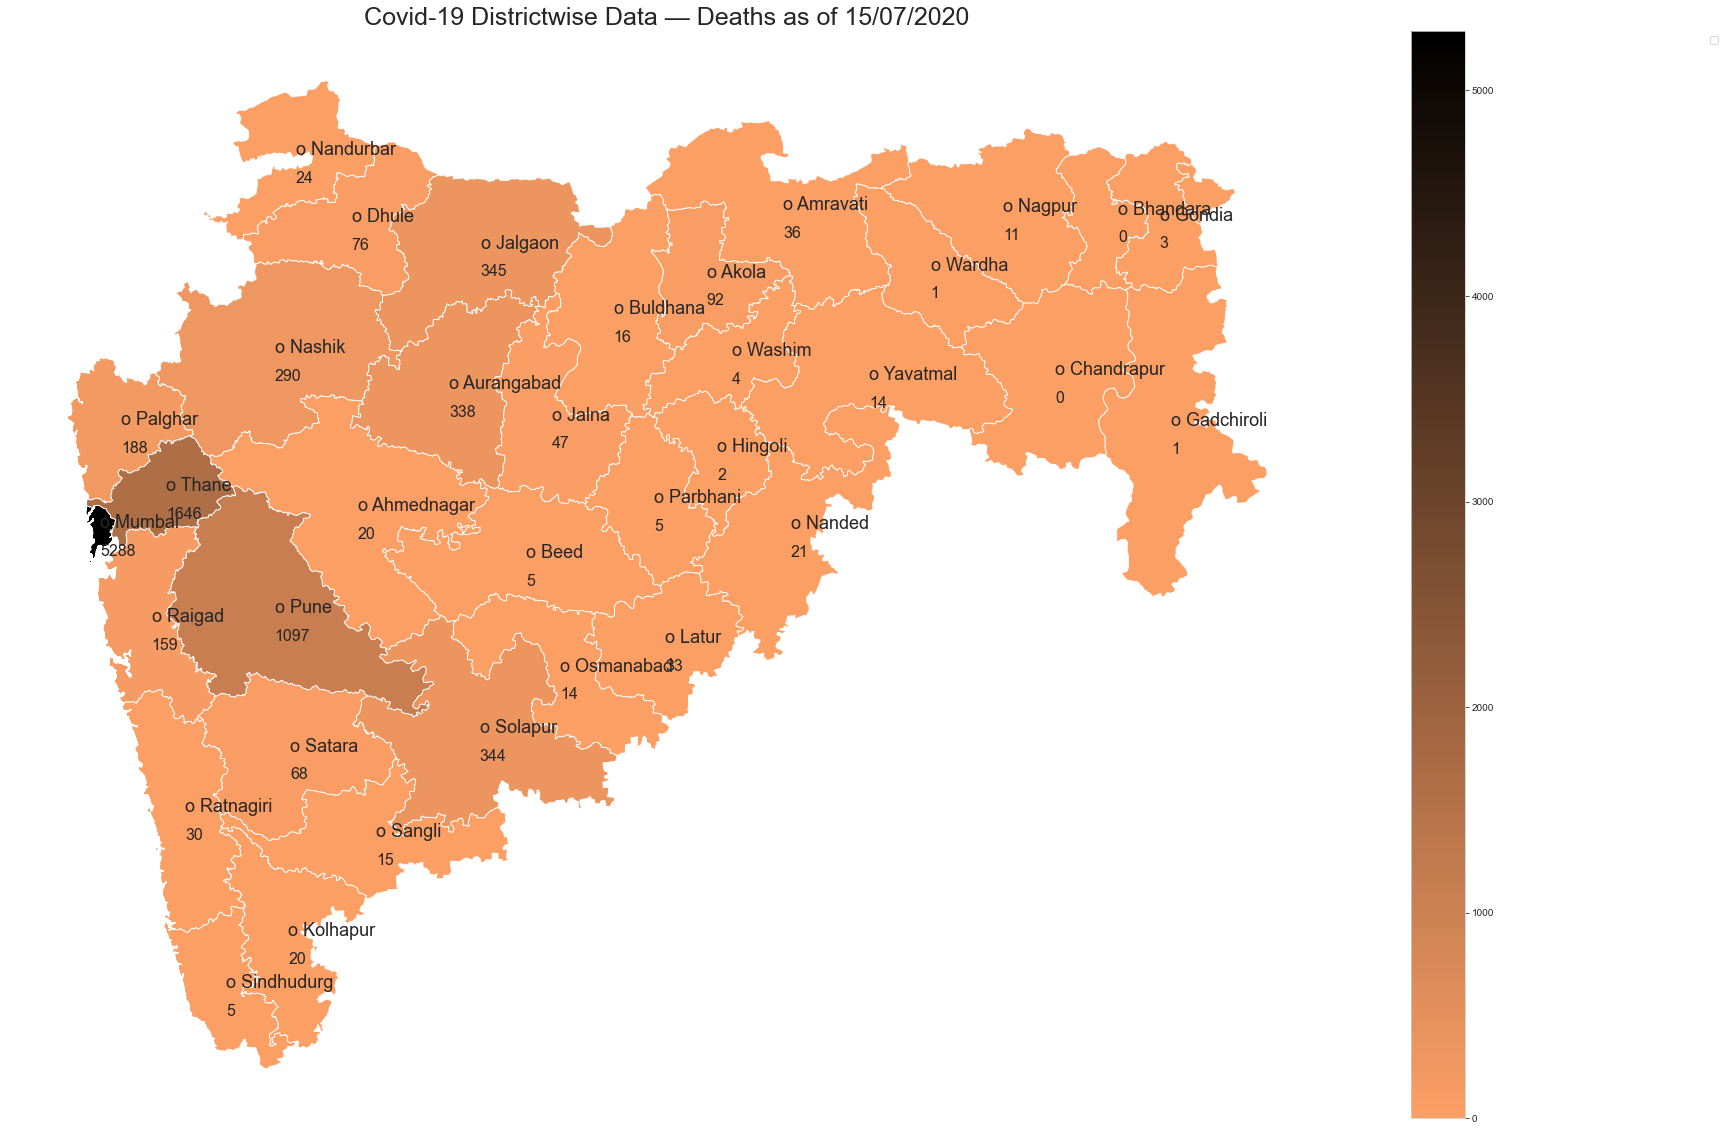

In [1029]:
fig, ax = plt.subplots(1, figsize=(30, 20))
ax.axis('off')
cmap1=plt.cm.get_cmap('copper_r',516)
cmap2=ListedColormap(cmap1(np.linspace(0.2,1,256)))

t='Covid-19 Districtwise Data — Deaths as of '+ str(date.today().strftime("%d/%m/%Y"))

ax.set_title(t, 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Death', cmap=cmap2, 
                 linewidth=0.9, ax=ax, edgecolor='1', 
                 legend = True)
plt.legend(merged_data['Death'])
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))

for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["District"]):
    texts.append(plt.text(x, y, 'o '+label, fontsize = 18))
for x, y, label in zip(t_points.geometry.x, t_points.geometry.y, t_points["Death"]):
    plt.text(x, (y-0.18), label, fontsize = 16)    
      
plt.show()

##### So this is visualization of covid cases in Maharashra.
Data cleaning will differ a little, state to state.